<a href="https://colab.research.google.com/github/SusanYTSu/mkt_channel_attribution/blob/main/Mkt_Channel_Attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Attribution/Attribution.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   conversion          5000 non-null   int64  
 1   revenue             5000 non-null   float64
 2   rebate              5000 non-null   int64  
 3   channel             5000 non-null   int64  
 4   purchase_frequency  5000 non-null   int64  
 5   purchase_monetary   5000 non-null   float64
 6   weeks_since_visit   5000 non-null   int64  
 7   browsing_minutes    5000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.6 KB


In [ ]:
df.head()

,conversion,revenue,rebate,channel,purchase_frequency,purchase_monetary,weeks_since_visit,browsing_minutes
0,0,0.0,0,2,6,62.99,6,1
1,0,0.0,1,1,2,53.99,0,7
2,0,0.0,1,2,3,88.98,3,4
3,0,0.0,0,2,1,68.99,1,19
4,0,0.0,1,3,3,66.49,4,20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff633cae790>,
      dtype=object)

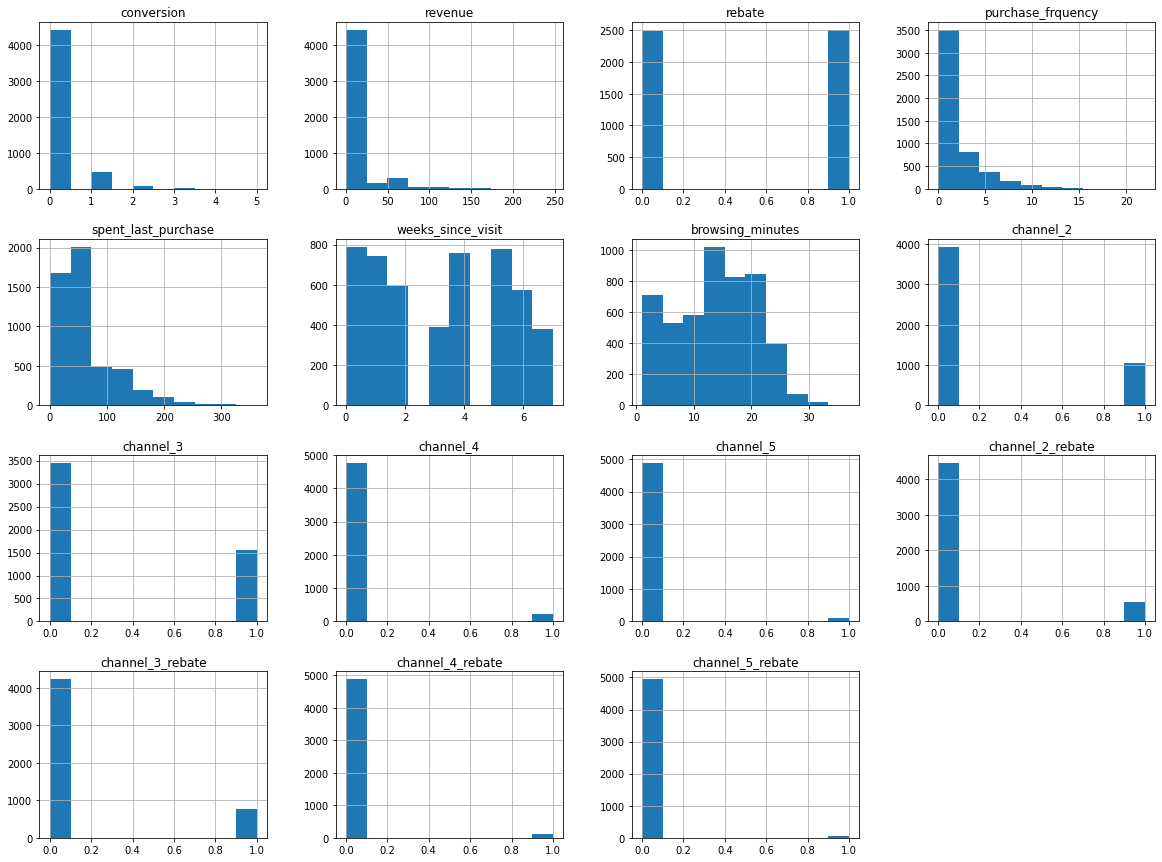

In [ ]:
df.hist(figsize= (20,15))

In [ ]:
df = pd.get_dummies(df, prefix= "channel", columns = ["channel"], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   conversion          5000 non-null   int64  
 1   revenue             5000 non-null   float64
 2   rebate              5000 non-null   int64  
 3   purchase_frequency  5000 non-null   int64  
 4   purchase_monetary   5000 non-null   float64
 5   weeks_since_visit   5000 non-null   int64  
 6   browsing_minutes    5000 non-null   int64  
 7   channel_2           5000 non-null   uint8  
 8   channel_3           5000 non-null   uint8  
 9   channel_4           5000 non-null   uint8  
 10  channel_5           5000 non-null   uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 293.1 KB


### 2-way interaction

In [ ]:
df["channel_2_rebate"] = df["channel_2"]*df["rebate"]
df["channel_3_rebate"] = df["channel_3"]*df["rebate"]
df["channel_4_rebate"] = df["channel_4"]*df["rebate"]
df["channel_5_rebate"] = df["channel_5"]*df["rebate"]

In [ ]:
X = df.drop(["conversion","channel_2","channel_3","channel_4","channel_5","rebate","revenue"], axis = 1 )

In [ ]:
y = df.revenue 

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     92.84
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          2.50e-144
Time:                        02:15:15   Log-Likelihood:                -22559.
No. Observations:                5000   AIC:                         4.514e+04
Df Residuals:                    4991   BIC:                         4.520e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.3673      0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### No interaction

In [ ]:
X3 = df.drop(["conversion","channel_2_rebate","channel_3_rebate","channel_4_rebate","channel_5_rebate","revenue"],axis=1)

In [ ]:
X4 = sm.add_constant(X3)
est3 = sm.OLS(y, X4)
est4 = est3.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     90.16
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          3.72e-156
Time:                        02:35:25   Log-Likelihood:                -22530.
No. Observations:                5000   AIC:                         4.508e+04
Df Residuals:                    4990   BIC:                         4.514e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2055      1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
